In [60]:
# import local files with defined functions to acquire and prepare data
import env
import acquire
import prepare

# import libraries for visualizations and statistics
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats


# import libraries for data handling and formatting
import os
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

# import libraries for creating and evaluating models
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_fscore_support

# Data Acquisition

In [2]:
# use the get_telco_data function in the acquire.py to connect to the codeup database.
# this function and uses an SQL query to retrieve data from several tables and returns a dataframe
df = acquire.get_telco_data()
df.head(5)

,internet_service_type_id,payment_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,payment_type,internet_service_type
0,1,2,2,0002-ORFBO,Female,0,Yes,Yes,9,Yes,...,Yes,Yes,No,Yes,65.6,593.3,No,One year,Mailed check,DSL
1,1,2,1,0003-MKNFE,Male,0,No,No,9,Yes,...,No,No,Yes,No,59.9,542.4,No,Month-to-month,Mailed check,DSL
2,2,1,1,0004-TLHLJ,Male,0,No,No,4,Yes,...,No,No,No,Yes,73.9,280.85,Yes,Month-to-month,Electronic check,Fiber optic
3,2,1,1,0011-IGKFF,Male,1,Yes,No,13,Yes,...,No,Yes,Yes,Yes,98.0,1237.85,Yes,Month-to-month,Electronic check,Fiber optic
4,2,2,1,0013-EXCHZ,Female,1,Yes,No,3,Yes,...,Yes,Yes,No,Yes,83.9,267.4,Yes,Month-to-month,Mailed check,Fiber optic


# Data Cleaning

In [3]:
df.shape

(7043, 24)

In [4]:
df.dtypes

internet_service_type_id      int64
payment_type_id               int64
contract_type_id              int64
customer_id                  object
gender                       object
senior_citizen                int64
partner                      object
dependents                   object
tenure                        int64
phone_service                object
multiple_lines               object
online_security              object
online_backup                object
device_protection            object
tech_support                 object
streaming_tv                 object
streaming_movies             object
paperless_billing            object
monthly_charges             float64
total_charges                object
churn                        object
contract_type                object
payment_type                 object
internet_service_type        object
dtype: object

In [5]:
# check for nulls
df.isnull().sum()

internet_service_type_id    0
payment_type_id             0
contract_type_id            0
customer_id                 0
gender                      0
senior_citizen              0
partner                     0
dependents                  0
tenure                      0
phone_service               0
multiple_lines              0
online_security             0
online_backup               0
device_protection           0
tech_support                0
streaming_tv                0
streaming_movies            0
paperless_billing           0
monthly_charges             0
total_charges               0
churn                       0
contract_type               0
payment_type                0
internet_service_type       0
dtype: int64

In [6]:
# total charges looks like a float but is a string.  Attempt to convert directly using:  
#.       df.total_charges.astype(float)
# returns an error that a '' can't be converted.  

df.total_charges = df.total_charges.str.replace(' ', '0')
df.total_charges = df.total_charges.astype(float)

In [7]:
df.total_charges.dtypes

dtype('float64')

<font color='green'>
*** confirmed conversion worked.  Add the two lines for the conversion to the prepare.py file
    
    df.total_charges = df.total_charges.str.replace(' ', '0')
    df.total_charges = df.total_charges.astype(float)
</font>

In [8]:
# The *_id columns are from the SQL joins in the database and the values are represented elsewhere.  
df = df.drop(columns=['internet_service_type_id', 'payment_type_id', 'contract_type_id'])
df.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,payment_type,internet_service_type
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,No,Yes,...,Yes,Yes,No,Yes,65.6,593.30,No,One year,Mailed check,DSL
1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,No,No,...,No,No,Yes,No,59.9,542.40,No,Month-to-month,Mailed check,DSL
2,0004-TLHLJ,Male,0,No,No,4,Yes,No,No,No,...,No,No,No,Yes,73.9,280.85,Yes,Month-to-month,Electronic check,Fiber optic
3,0011-IGKFF,Male,1,Yes,No,13,Yes,No,No,Yes,...,No,Yes,Yes,Yes,98.0,1237.85,Yes,Month-to-month,Electronic check,Fiber optic
4,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,No,No,...,Yes,Yes,No,Yes,83.9,267.40,Yes,Month-to-month,Mailed check,Fiber optic


<font color='green'>
*** confirmed column drops worked.  Add the line to the prepare.py file
    
    df = df.drop(columns=['internet_service_type_id', 'payment_type_id', 'contract_type_id'])

</font>

In [9]:
# determine what columns are binary
cols = df.columns.to_list()

for col in cols:
    print(col, df[col].nunique())

customer_id 7043
gender 2
senior_citizen 2
partner 2
dependents 2
tenure 73
phone_service 2
multiple_lines 3
online_security 3
online_backup 3
device_protection 3
tech_support 3
streaming_tv 3
streaming_movies 3
paperless_billing 2
monthly_charges 1585
total_charges 6531
churn 2
contract_type 3
payment_type 4
internet_service_type 3


In [10]:
# encode binary columns with 1 and 0 instead of 'Yes' and 'No' (dropping first)

dummies = pd.get_dummies(df[['gender', 'partner', 'dependents', 'phone_service', 
                             'paperless_billing', 'churn']], drop_first=True)
df = df.drop(columns=['churn'])



In [11]:
# rename the dummy columns as necessary and add to df
dummies.rename(columns = {'churn_Yes':'churn',
                          'paperless_billing_Yes' : 'paperless_billing',
                          'phone_service_Yes': 'phone_service',
                          'dependents_Yes': 'dependents', 
                          'gender_Male': 'male',
                          'partner_Yes' : 'partner'}, inplace = True)

df = pd.concat([df, dummies], axis=1)
df.head().T

,0,1,2,3,4
customer_id,0002-ORFBO,0003-MKNFE,0004-TLHLJ,0011-IGKFF,0013-EXCHZ
gender,Female,Male,Male,Male,Female
senior_citizen,0,0,0,1,1
partner,Yes,No,No,Yes,Yes
dependents,Yes,No,No,No,No
tenure,9,9,4,13,3
phone_service,Yes,Yes,Yes,Yes,Yes
multiple_lines,No,Yes,No,No,No
online_security,No,No,No,No,No
online_backup,Yes,No,No,Yes,No


In [12]:
# for columns with 3/4 values, encode and do not drop first
dummies2 = pd.get_dummies(df[['multiple_lines', 'online_security', 'online_backup', 'device_protection',
                             'tech_support', 'streaming_tv', 'streaming_movies', 'contract_type', 
                             'payment_type', 'internet_service_type']], drop_first=False)

dummies2


,multiple_lines_No,multiple_lines_No phone service,multiple_lines_Yes,online_security_No,online_security_No internet service,online_security_Yes,online_backup_No,online_backup_No internet service,online_backup_Yes,device_protection_No,...,contract_type_Month-to-month,contract_type_One year,contract_type_Two year,payment_type_Bank transfer (automatic),payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check,internet_service_type_DSL,internet_service_type_Fiber optic,internet_service_type_None
0,1,0,0,1,0,0,0,0,1,1,...,0,1,0,0,0,0,1,1,0,0
1,0,0,1,1,0,0,1,0,0,1,...,1,0,0,0,0,0,1,1,0,0
2,1,0,0,1,0,0,1,0,0,0,...,1,0,0,0,0,1,0,0,1,0
3,1,0,0,1,0,0,0,0,1,0,...,1,0,0,0,0,1,0,0,1,0
4,1,0,0,1,0,0,1,0,0,1,...,1,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,0,0,0,1,1,0,0,1,...,0,1,0,0,0,0,1,1,0,0
7039,0,0,1,1,0,0,1,0,0,1,...,1,0,0,0,0,1,0,0,1,0
7040,1,0,0,1,0,0,0,0,1,1,...,1,0,0,0,0,0,1,1,0,0
7041,1,0,0,0,0,1,1,0,0,0,...,0,0,1,0,0,0,1,1,0,0


In [13]:
# concat to df
df = pd.concat([df, dummies2], axis=1)
df.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,...,contract_type_Month-to-month,contract_type_One year,contract_type_Two year,payment_type_Bank transfer (automatic),payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check,internet_service_type_DSL,internet_service_type_Fiber optic,internet_service_type_None
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,No,Yes,...,0,1,0,0,0,0,1,1,0,0
1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,No,No,...,1,0,0,0,0,0,1,1,0,0
2,0004-TLHLJ,Male,0,No,No,4,Yes,No,No,No,...,1,0,0,0,0,1,0,0,1,0
3,0011-IGKFF,Male,1,Yes,No,13,Yes,No,No,Yes,...,1,0,0,0,0,1,0,0,1,0
4,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,No,No,...,1,0,0,0,0,0,1,0,1,0


In [14]:
# create list of column names and list value counts to determine what cols can now be delete
df.head(2).T

,0,1
customer_id,0002-ORFBO,0003-MKNFE
gender,Female,Male
senior_citizen,0,0
partner,Yes,No
dependents,Yes,No
tenure,9,9
phone_service,Yes,Yes
multiple_lines,No,Yes
online_security,No,No
online_backup,Yes,No


In [15]:
# remove extra columns
df = df.drop(columns=['gender', 'partner', 'dependents', 'phone_service', 'multiple_lines',
                'online_security', 'online_backup', 'device_protection', 'tech_support', 
                'streaming_tv', 'streaming_movies', 'paperless_billing', 
                'contract_type', 'payment_type', 'internet_service_type'])

In [16]:
# lower case remaining columns and clean up spaces/parenthesis
df.columns = map(str.lower, df.columns)
df.columns = df.columns.str.replace(' ', '_')
df.columns = df.columns.str.replace('_service', '')
df.columns = df.columns.str.replace("automatic", 'auto').str.replace('(', '').str.replace(')', '')
df.head().T

,0,1,2,3,4
customer_id,0002-ORFBO,0003-MKNFE,0004-TLHLJ,0011-IGKFF,0013-EXCHZ
senior_citizen,0,0,0,1,1
tenure,9,9,4,13,3
monthly_charges,65.6,59.9,73.9,98.0,83.9
total_charges,593.3,542.4,280.85,1237.85,267.4
male,0,1,1,1,0
churn,0,0,1,1,1
multiple_lines_no,1,0,1,1,1
multiple_lines_no_phone,0,0,0,0,0
multiple_lines_yes,0,1,0,0,0


In [17]:
# create add-ons column that provides a count of the number of add-on services: 
# online security, online backup, device protection, device protection, tech support, streaming tv, streaming movies

df['addon_count'] = df['online_security_yes'] + df['online_backup_yes'] + df['device_protection_yes'] + df['tech_support_yes'] + df['streaming_tv_yes'] + df['streaming_movies_yes']

In [18]:
df.addon_count.value_counts()

0    2219
3    1118
2    1033
1     966
4     852
5     571
6     284
Name: addon_count, dtype: int64

In [19]:
# split data into train/validate/test using split function in the prepare file.  
train, validate, test = prepare.my_split(df, target='churn')

<font color='green'>
*** confirmed column encoding and drops worked.  Add the applicable lines to the prepare.py file
    

</font>

# Data Exploration

In [ ]:
# observe strength of correlation between each independent variable and the dependent variable
# correlations are sorted from strongest positive correlation to strongest negative correlation

In [46]:
train.corr()[['churn']].sort_values(by='churn', ascending=False)

,churn
churn,1.000000
contract_type_month-to-month,0.406645
tech_support_no,0.348348
online_security_no,0.338505
payment_type_electronic_check,0.302923
internet_type_fiber_optic,0.296772
online_backup_no,0.257982
device_protection_no,0.249164
monthly_charges,0.179849
streaming_movies_no,0.143218


### The strongest drivers of churn (positive correlation) are:  

    - month-to-month contracts    
    - No online security (has internet)
    - No tech support (has internet)
    - Fiber optic internet
    - payment by electronic check
    - No online backup (has internet)
    - No device protection (has internet)
    - Monthly charges
</font>

### The strongest drivers of retention (negative correlation) are:
    - Tenure
    - Two-year contracts
    - No internet (reflected in add-ons_no_internet and internet_type_none)
    - Total charges
    - One year contract
    
#### The retention drivers tenure and total charges are more likely driven by churn as opposed to causing churn.  Those that don't churn are going to have higher tenure and therefore higher lifetime charges               

# Lets explore the target variable, churn

In [39]:
baseline = round(train.churn.mean() ,4)
print('Our baseline for predictions is that ', baseline,' of customers churn')

Our baseline for predictions is that  0.2653  of customers churn


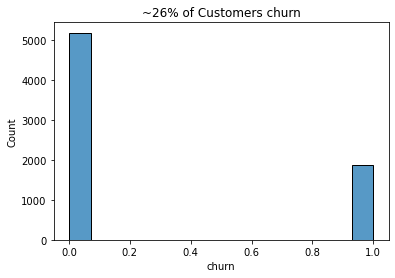

In [144]:
sns.histplot(df.churn)
plt.title('~26% of Customers churn')
plt.show()

## Explore numerical variables

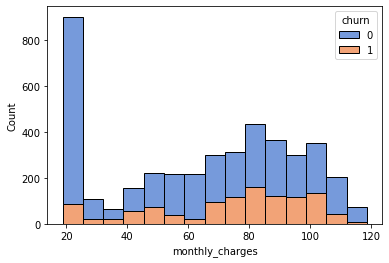

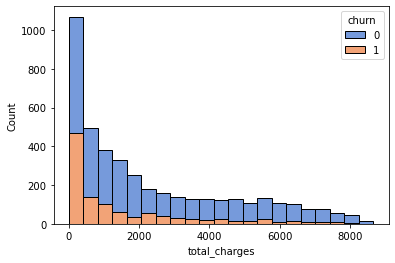

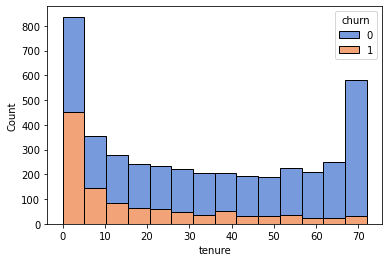

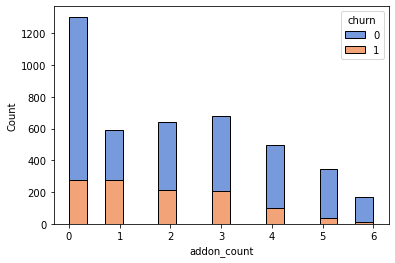

In [45]:
# create list of numerical columns and loop to make histplots in order to look at their distribution
nums = ['monthly_charges', 'total_charges', 'tenure', 'addon_count']
for col in nums:
    sns.histplot(x=col, data=train, hue='churn',multiple = 'stack', palette="muted")
    plt.show()

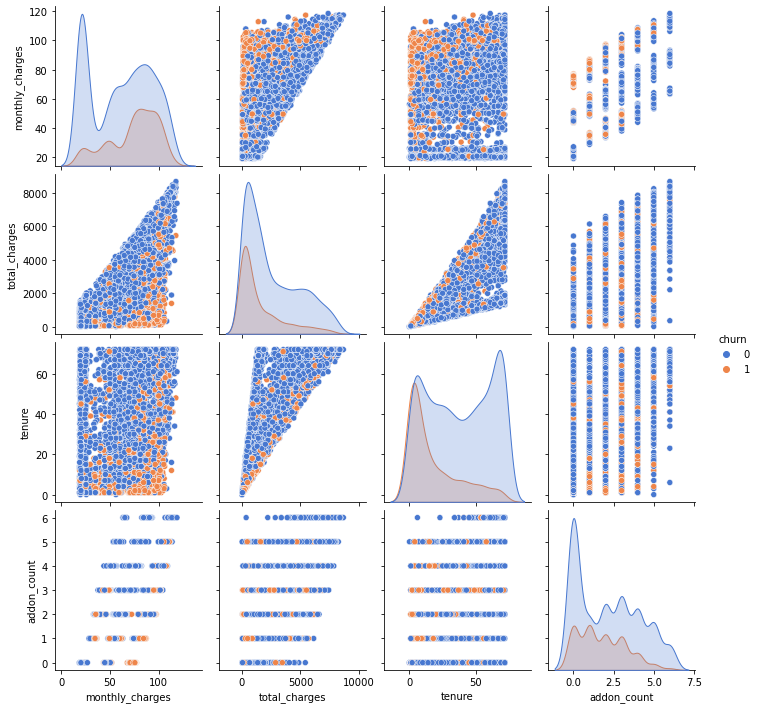

In [171]:
sns.pairplot(data=train,
             vars = ["monthly_charges", "total_charges", "tenure","addon_count"], 
             kind="scatter",                      
             diag_kind="kde",                       
             hue="churn",
             palette="muted"
             )
plt.show()

# Does internet service drive away customers?

In [47]:
# create subsets of those with and without internet and run tests
internet = train[train.internet_type_none == 0]
no_internet = train[train.internet_type_none == 1]
internet.shape, no_internet.shape

((3325, 39), (900, 39))

In [56]:
# compare rates of churn in each sample
print('Churn rate of those with internet is', round(internet.churn.mean(),4))
print('Churn rate of those without internet is', round(no_internet.churn.mean(),4))
print('Baseline churn rate was', baseline)

Churn rate of those with internet is 0.317
Churn rate of those without internet is 0.0744
Baseline churn rate was 0.2653


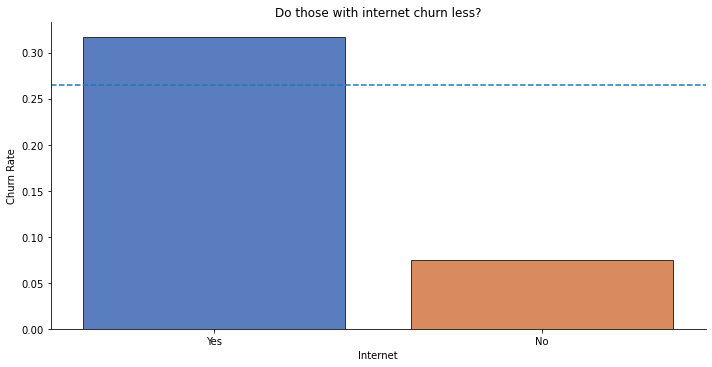

In [169]:

p = sns.factorplot( x="internet_type_none", y="churn",  data=train, size=5, 
                   aspect=2, kind="bar", palette="muted", ci=None,
                   edgecolor=".2")
plt.axhline(baseline, label = 'overall churn rate', ls='--')
p.set_xticklabels(['Yes','No'])
p.set_ylabels("Churn Rate")
p.set_xlabels("Internet")
plt.title('Do those with internet churn less?')
plt.show()



## it certainly appears those with internet churn more often than those without.  Let's test it!
    #### Use an Independent T-Test (2 samples)


In [142]:
# verify assumptions:  Samples are independent, and sample sizes are large enough to assume normal distribution
# check variance: 
print('internet variance:', internet.churn.var())
print('no internet variance:', no_internet.churn.var())

internet variance: 0.21657338291577322
no internet variance: 0.06897911259424053


In [61]:
H0 = 'There is no difference in churn between those with and without internet service'
Ha = 'There is a significant difference in churn between those with and without internet service'

α = .05

t, p = stats.ttest_ind(internet.churn, no_internet.churn, equal_var=False)
if p < α:
    print('We reject the null hypothesis.', Ha)
else:
    print('The null hypothesis is confirmed', H0)


We reject the null hypothesis. There is a significant difference in churn between those with and without internet service


# Those without add-ons appeared more likely to churn, lets explore that!

####  since add-ons only apply to those with internet service, we'll look at our previous subset of those with internet

In [94]:
adds = internet[internet.addon_count > 0]
no_adds = internet[internet.addon_count == 0]
adds.shape, no_adds.shape

((2921, 39), (404, 39))

In [95]:
# compare rates of churn in each sample
print('Churn rate of those with add-ons is', round(adds.churn.mean(),4))
print('Churn rate of those without add-ons is', round(no_adds.churn.mean(),4))
print('Baseline churn rate was', baseline)

Churn rate of those with add-ons is 0.2896
Churn rate of those without add-ons is 0.5149
Baseline churn rate was 0.2653


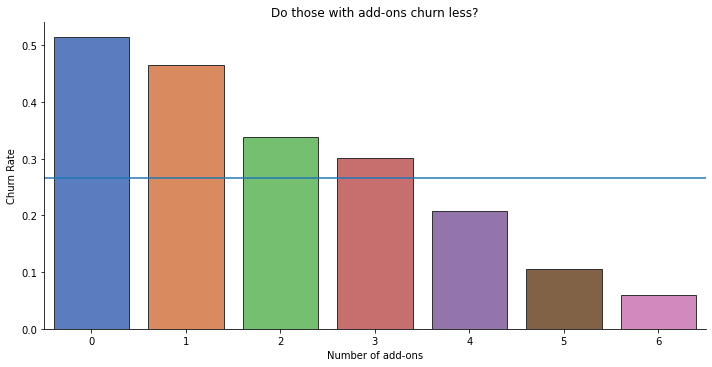

In [168]:
p = sns.factorplot( x="addon_count", y="churn",  data=internet, size=5, 
                   aspect=2, kind="bar", palette="muted", ci=None, 
                   edgecolor=".2")
plt.axhline(baseline, label = 'overall churn rate')
#p.set_xticklabels(['Yes','No'])
p.set_ylabels("Churn Rate")
p.set_xlabels("Number of add-ons")
plt.title('Do those with add-ons churn less?')
plt.show()


## it certainly appears those with internet churn more often than those without.  Let's test it!
   #### Use a chi square test

In [105]:
H0 = 'Churn is independent of the number of add-ons'
Ha = 'Churn is dependent on the number of add-ons'

In [104]:
# create observations using crosstab
observed = pd.crosstab(internet.churn, internet.addon_count)
observed

addon_count,0,1,2,3,4,5,6
churn,,,,,,,
0,196,317,423,476,392,307,160
1,208,275,216,206,103,36,10


In [134]:
# calculate chi2 values
chi2, p, degf, expected = stats.chi2_contingency(observed)

expected = pd.DataFrame(expected).astype(int)

print('Observed\n')
print(pd.DataFrame(observed.values))
print('---\nExpected\n')
print(expected)
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')
print('')

if p < α:
    print('We reject the null hypothesis.', Ha)
else:
    print('The null hypothesis is confirmed', H0)

Observed

     0    1    2    3    4    5    6
0  196  317  423  476  392  307  160
1  208  275  216  206  103   36   10
---
Expected

     0    1    2    3    4    5    6
0  275  404  436  465  338  234  116
1  128  187  202  216  156  108   53
---

chi^2 = 285.2543
p     = 0.0000

We reject the null hypothesis. Churn is dependent on the number of add-ons


## Explore Monthly Charges for add-on services

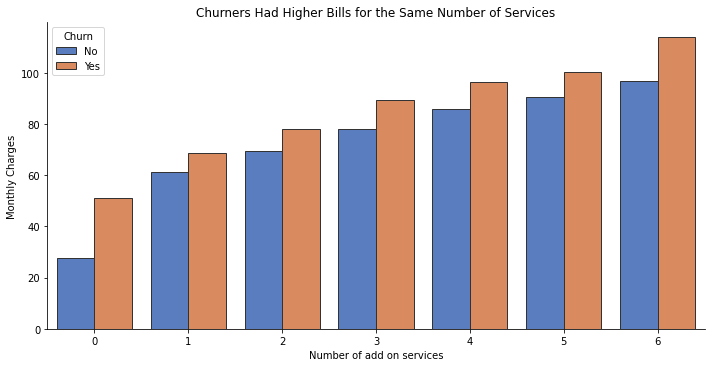

In [173]:
m = sns.factorplot(x="addon_count", y="monthly_charges", hue='churn', data=train,
                   size=5, aspect=2, kind="bar", palette="muted", ci=None, 
                   edgecolor=".2", legend=False)

# sns.barplot(x='addon_count', y='monthly_charges', data=internet, hue='churn', palette='muted', size=5, aspect=2,)
plt.title('Churners Had Higher Bills for the Same Number of Services')
plt.xlabel('Number of add on services')
plt.ylabel('Monthly Charges')
plt.legend(title='Churn', labels=['No', 'Yes'])
plt.show()